# Módulo 1 - Trabalho Prático

Esse notebook se refere ao primeiro módulo do bootcamp ciência de dados e tem como objetivo responder ao **primeiro trabalho prático**. 

## 1.1 Exemplo de Clusterização com K-Means

O algoritimo K-Means é um método de Clustering, não-supervisionado que tenta encontrar similaridades entre os dados e agrupá-los conforme o número de cluster.

** Premissas: **

Considere um dataset gerado pelo seguinte comando:
**make_blobs(n_samples=500, centers=20, random_state=999)**

Ao executar o algoritmo K-Means, considere os parâmetros: 

* init = k-means++
* max_iter = 300
* n_init = 10

Obs.: A função ** make_blobs()** pode ser usada para gerar pontos com uma distribuição gaussiana.

In [1]:
# Importando as Bibliotecas
from math import sqrt
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import pandas as pd 
from datetime import datetime
sns.set_theme(style="white")

In [2]:
# Gerando os dados
X, y = make_blobs(n_samples=500, centers=20, random_state=999)

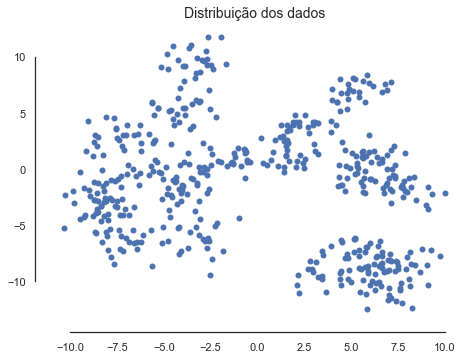

In [3]:
# Gerando um gráfico de dispersão para os dados
f, ax = plt.subplots(figsize=(7.5, 5.5))
sns.scatterplot(x=X[:,0], y=X[:,1], linewidth=0, ax=ax)
sns.despine(offset=10, trim=True)
plt.title('Distribuição dos dados', fontsize=14)
plt.show()

In [4]:
# Calculando o KMeans para 1 cluster
kmeans = KMeans(n_clusters=1, init='k-means++', max_iter=300, n_init=10)
pred_y = kmeans.fit_predict(X)
print('A coordenada do centroide é {}'.format(kmeans.cluster_centers_))
print(" ")
print('A soma dos quadrados intra-clusters é {}'.format(kmeans.inertia_))

A coordenada do centroide é [[ 0.02618523 -1.30384304]]
 
A soma dos quadrados intra-clusters é 31547.372471390474


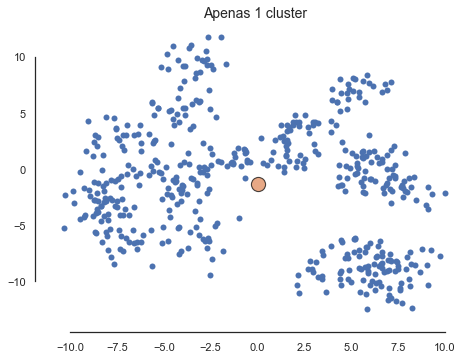

In [5]:
# E nos dados, como ficaria?
f, ax = plt.subplots(figsize=(7.5, 5.5))
sns.scatterplot(x=X[:,0], y=X[:,1], linewidth=0, ax=ax)
sns.scatterplot(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], ec='black', s=200, alpha=0.7)
sns.despine(offset=10, trim=True)
plt.title('Apenas 1 cluster', fontsize=14)
plt.show()

In [6]:
#Função para a soma dos quadrados intra-clusters (WCSS)
def optimal_number_of_clusters(wcss):
    x1, y1 = 1, wcss[0]
    x2, y2 = 19, wcss[len(wcss)-1]
    distances = []
    for i in range(len(wcss)):
        x0 = i + 1
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 1

In [7]:
# Usando o WCSS para calcular o número ideal de clusters
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
n = optimal_number_of_clusters(wcss)

print('O número ideal de clusters é {}'.format(n))

O número ideal de clusters é 4


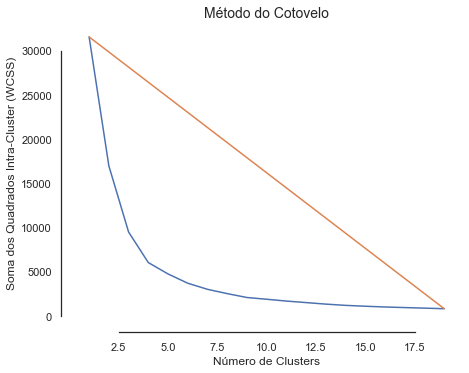

In [8]:
# Visualizando o número ideal de clusters pelo Método do Cotovelo
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
f, ax = plt.subplots(figsize=(7.0, 5.5))
sns.lineplot(range(1, 20), wcss)
sns.lineplot([1, 19],[wcss[0], wcss[len(wcss)-1]])
plt.title('Método do Cotovelo', fontsize=14)
plt.xlabel('Número de Clusters')
plt.ylabel('Soma dos Quadrados Intra-Cluster (WCSS)')
sns.despine(offset=10, trim=True)
plt.show()

In [9]:
# Como ficaria o número ideal de cluster em nossos dados
kmeansOtimo = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10)
pred_y = kmeansOtimo.fit_predict(X)

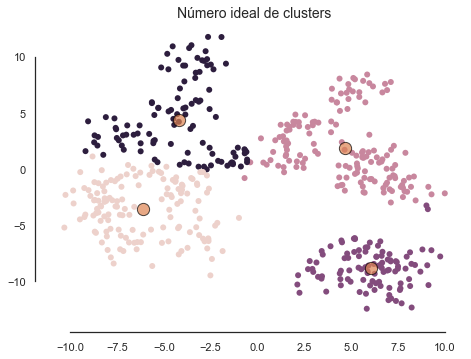

In [10]:
f, ax = plt.subplots(figsize=(7.5, 5.5))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=pred_y, linewidth=0, ax=ax, legend=False)
sns.scatterplot(kmeansOtimo.cluster_centers_[:,0], kmeansOtimo.cluster_centers_[:,1], ec='black', s=150, alpha=0.7)
sns.despine(offset=10, trim=True)
plt.title('Número ideal de clusters', fontsize=14)
plt.show()

## 1.2 Análise exploratória de dados

* Os gráficos da análise exploratória originalmente foram criados no PowerBI e por conveniência plotados nesse notebook, respondendo as questões específicas do trabalho prático

In [11]:
#Importando o dataset
df = pd.read_csv('covid_19_data.csv',encoding='UTF-8',sep=',') 
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [12]:
#Renomeado as colunas
df = df.rename(columns={'Country/Region':'Country'})
df = df.rename(columns={'ObservationDate':'Date'})

#Calculando a quantidade de casos ativos
df['Active'] = df['Confirmed'] - (df['Recovered'] + df['Deaths'])

#Convertendo a coluna Date para data
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

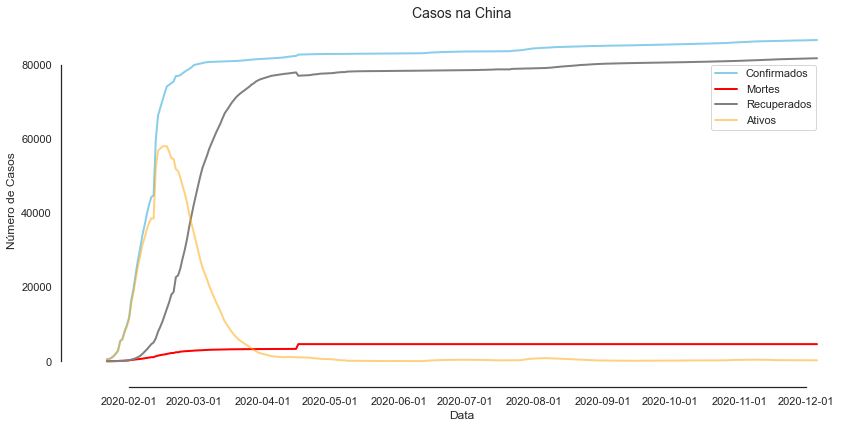

In [13]:
#Respondendo ao comportamento dos casos observando apenas a China
China = df.query("Country == 'Mainland China'")
China_Cases = China.groupby(['Date']).sum().reset_index()
f, ax = plt.subplots(figsize=(14.0, 6.5))
sns.lineplot(data=China_Cases, x="Date", y="Confirmed", color='skyblue', linewidth=2, label="Confirmados")
sns.lineplot(data=China_Cases, x="Date", y="Deaths", color='red', linewidth=2, label="Mortes")
sns.lineplot(data=China_Cases, x="Date", y="Recovered", color='gray', linewidth=2, label="Recuperados")
sns.lineplot(data=China_Cases, x="Date", y="Active", color='orange', alpha=0.5, linewidth=2, label="Ativos")
plt.title('Casos na China', fontsize=14)
plt.xlabel('Data')
plt.ylabel('Número de Casos')
sns.despine(offset=10, trim=True)
plt.legend(bbox_to_anchor=(0.0, 0.8, 0.96, 0.1), loc='upper right')
plt.show()

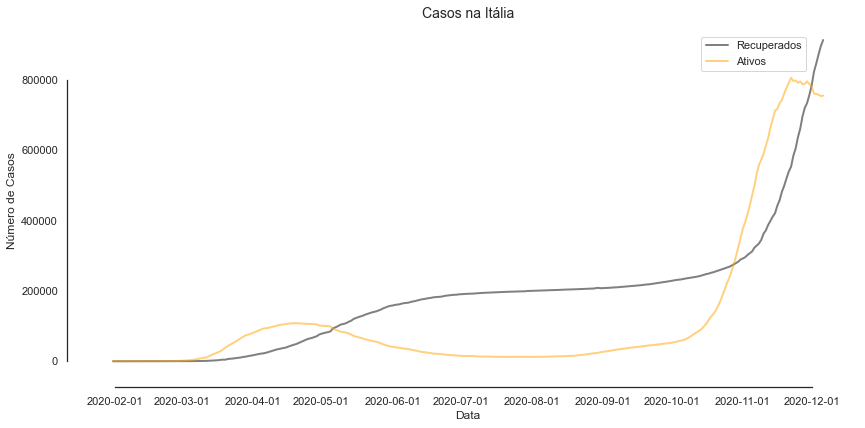

In [14]:
#Na Itália o número de recuperados ultrapassa o número de ativos em Maio
Italy = df.query("Country == 'Italy'")
Italy_Cases = Italy.groupby(['Date']).sum().reset_index()
f, ax = plt.subplots(figsize=(14.0, 6.5))
sns.lineplot(data=Italy_Cases, x="Date", y="Recovered", color='gray', linewidth=2, label="Recuperados")
sns.lineplot(data=Italy_Cases, x="Date", y="Active", color='orange', alpha=0.5, linewidth=2, label="Ativos")
plt.title('Casos na Itália', fontsize=14)
plt.xlabel('Data')
plt.ylabel('Número de Casos')
sns.despine(offset=10, trim=True)
plt.legend(bbox_to_anchor=(0.0, 0.88, 0.94, 0.1), loc='upper right')
plt.show()

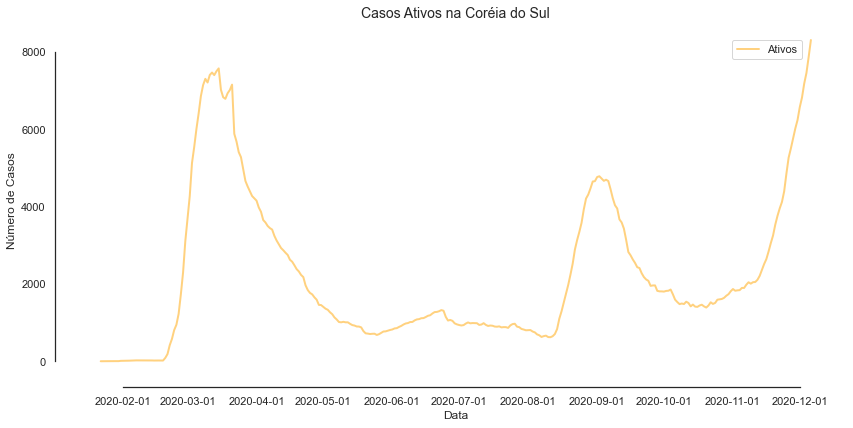

In [15]:
#Na Coréia do Sul o primeiro pico de casos ativos acontece em Março
Korea = df.query("Country == 'South Korea'")
Korea_Cases = Korea.groupby(['Date']).sum().reset_index()
f, ax = plt.subplots(figsize=(14.0, 6.5))
sns.lineplot(data=Korea_Cases, x="Date", y="Active", color='orange', alpha=0.5, linewidth=2, label="Ativos")
plt.title('Casos Ativos na Coréia do Sul', fontsize=14)
plt.xlabel('Data')
plt.ylabel('Número de Casos')
sns.despine(offset=10, trim=True)
plt.legend(bbox_to_anchor=(0.0, 0.87, 0.95, 0.1), loc='upper right')
plt.show()

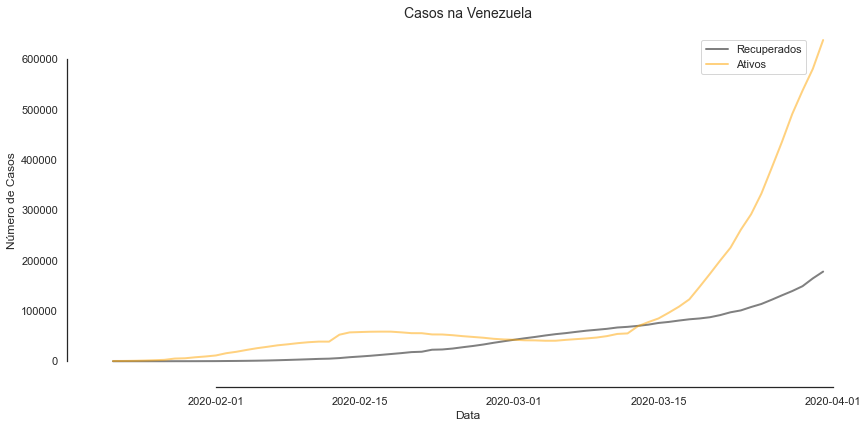

In [16]:
#Na Venezuela o número de casos recuperados ultrapassa o de ativos pela primeira vez em Março
#PS.: A resposta correta para o desafio originalmente foi Abril, porém com os dados atualizados isso pode ter sido alterado. 

Venezuela = df.query("Country == 'Venezuela'" and "Date < '2020-04-01'")
Venezuela_Cases = Venezuela.groupby(['Date']).sum().reset_index()
f, ax = plt.subplots(figsize=(14.0, 6.5))
sns.lineplot(data=Venezuela_Cases, x="Date", y="Recovered", color='gray', linewidth=2, label="Recuperados")
sns.lineplot(data=Venezuela_Cases, x="Date", y="Active", color='orange', alpha=0.5, linewidth=2, label="Ativos")
plt.title('Casos na Venezuela', fontsize=14)
plt.xlabel('Data')
plt.ylabel('Número de Casos')
sns.despine(offset=10, trim=True)
plt.legend(bbox_to_anchor=(0.0, 0.87, 0.94, 0.1), loc='upper right')
plt.show()